# instalation des bibliothèques

In [ ]:
pip install numpy opencv-python matplotlib


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Charger et afficher une image


In [ ]:
# Charger une image
image = cv2.imread("/content/lena.tif")

# Vérifier si l'image a été chargée
if image is None:
    print("Erreur : Impossible de charger l'image.")
else:
    print("Image chargée avec succès !")

Image chargée avec succès !


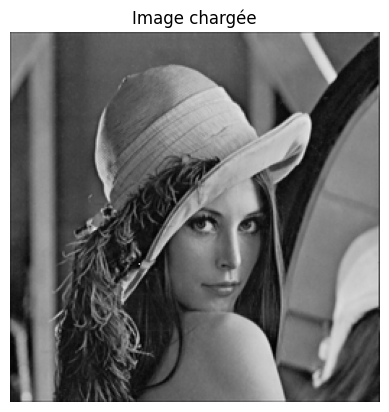

In [ ]:
# Convertir les couleurs de BGR  à RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image
plt.imshow(image_rgb)
plt.axis("off")  # Masquer les axes
plt.title("Image chargée")
plt.show()


In [ ]:
# Sauvegarder une image modifiée
cv2.imwrite("/content/sample_data/image/lena.tif", image)
print("Image sauvegardée avec succès !")


Image sauvegardée avec succès !


#1.Implémenter les transformations "from scratch"

##a. Addition d’images

In [ ]:
# Définir la fonction d'addition
def add_images(image1, image2):
    h, w, _ = image1.shape
    added_image = np.zeros((h, w, 3), dtype=np.uint8)
    for row in range(h):
        for col in range(w):
            for channel in range(3):
                added_pixel_value = float(image1[row, col, channel]) + float(image2[row, col, channel])
                added_pixel_value = min(max(added_pixel_value, 0), 255)  # Clamp values
                added_image[row, col, channel] = int(added_pixel_value)
    return added_image



In [ ]:
# Charger les deux images
image1 = cv2.imread("/content/lena.tif")
image2 = cv2.imread("/content/sample_data/image/lena.tif")




In [ ]:
# Redimensionner les images pour qu'elles aient la même taille
image1 = cv2.resize(image1, (300, 300))
image2 = cv2.resize(image2, (300, 300))

# Appliquer l'addition
added_image = add_images(image1, image2)



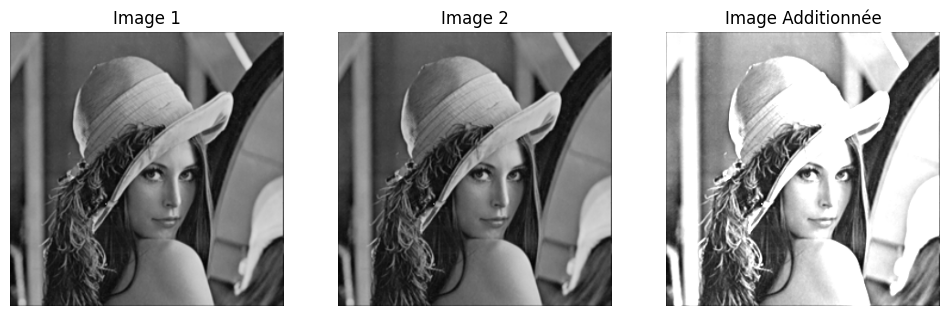

Image additionnée sauvegardée avec succès !


In [ ]:
# Convertir les images en RGB pour affichage avec Matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
added_image_rgb = cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB)

# Afficher les images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.title("Image 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.title("Image 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(added_image_rgb)
plt.title("Image Additionnée")
plt.axis("off")

plt.show()

# Sauvegarder l'image additionnée
cv2.imwrite("added_image.jpg", added_image)
print("Image additionnée sauvegardée avec succès !")

##b. Soustraction d’images

In [ ]:
def subtract_images(image1, image2):
    h, w, _ = image1.shape
    subtracted_image = np.zeros((h, w, 3), dtype=np.uint8)
    for row in range(h):
        for col in range(w):
            for channel in range(3):
                subtracted_pixel_value = float(image1[row, col, channel]) - float(image2[row, col, channel])
                subtracted_pixel_value = min(max(subtracted_pixel_value, 0), 255)  # Clamp values
                subtracted_image[row, col, channel] = int(subtracted_pixel_value)
    return subtracted_image


In [ ]:
# Appliquer la soustraction
subtracted_image = subtract_images(image1, image2)

In [ ]:
# Convertir les images pour affichage
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
subtracted_image_rgb = cv2.cvtColor(subtracted_image, cv2.COLOR_BGR2RGB)

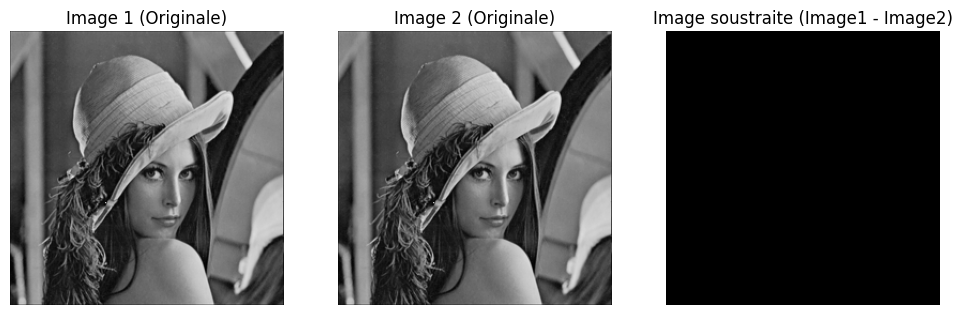

In [ ]:
# Afficher les résultats
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.title("Image 1 (Originale)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.title("Image 2 (Originale)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(subtracted_image_rgb)
plt.title("Image soustraite (Image1 - Image2)")
plt.axis("off")

plt.show()


##c. Multiplication par un scalaire

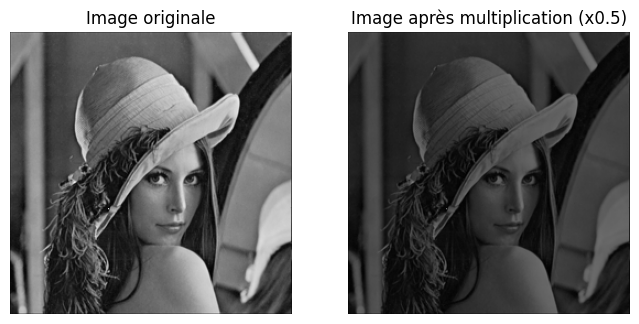

In [ ]:
# Définir la fonction de multiplication par un scalaire
def multiply_image(image, scalar):
    h, w, _ = image.shape
    multiplied_image = np.zeros((h, w, 3), dtype=np.uint8)
    for row in range(h):
        for col in range(w):
            for channel in range(3):
                multiplied_pixel_value = float(image[row, col, channel]) * scalar
                multiplied_pixel_value = min(max(multiplied_pixel_value, 0), 255)  # Clamp values
                multiplied_image[row, col, channel] = int(multiplied_pixel_value)
    return multiplied_image



# Appliquer la multiplication par un scalaire
scalar = 0.5
multiplied_image = multiply_image(image, scalar)

# Convertir les images pour affichage
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
multiplied_image_rgb = cv2.cvtColor(multiplied_image, cv2.COLOR_BGR2RGB)

# Afficher les résultats
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(multiplied_image_rgb)
plt.title(f"Image après multiplication (x{scalar})")
plt.axis("off")

plt.show()




## d.Translation (déplacement de l'image)

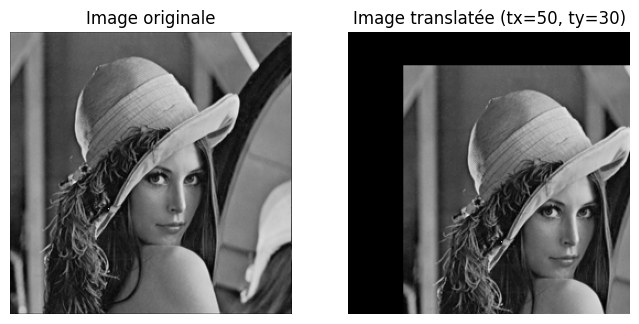

In [ ]:
def translate_image(image, tx, ty):
    h, w = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
    return translated_image


# Appliquer une translation
tx, ty = 50, 30  # Déplacement en pixels (horizontal, vertical)
translated_image = translate_image(image, tx, ty)

# Convertir pour affichage
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)

# Afficher les résultats
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(translated_image_rgb)
plt.title(f"Image translatée (tx={tx}, ty={ty})")
plt.axis("off")

plt.show()




##e. Rotation de l’image

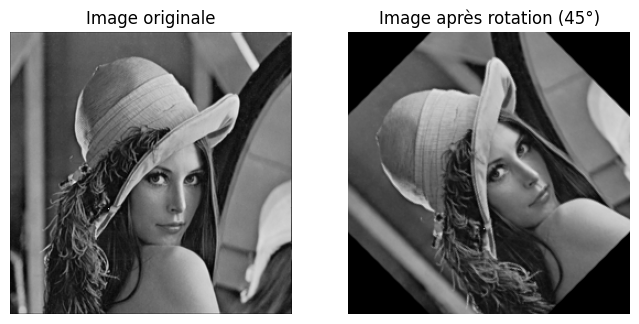

In [ ]:
def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image


# Appliquer une rotation
angle = 45
rotated_image = rotate_image(image, angle)

# Convertir pour affichage
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# Afficher les résultats
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated_image_rgb)
plt.title(f"Image après rotation ({angle}°)")
plt.axis("off")

plt.show()



#2.Implémentation des fonctions (from scratch)

## a. Calcul de l'histogramme

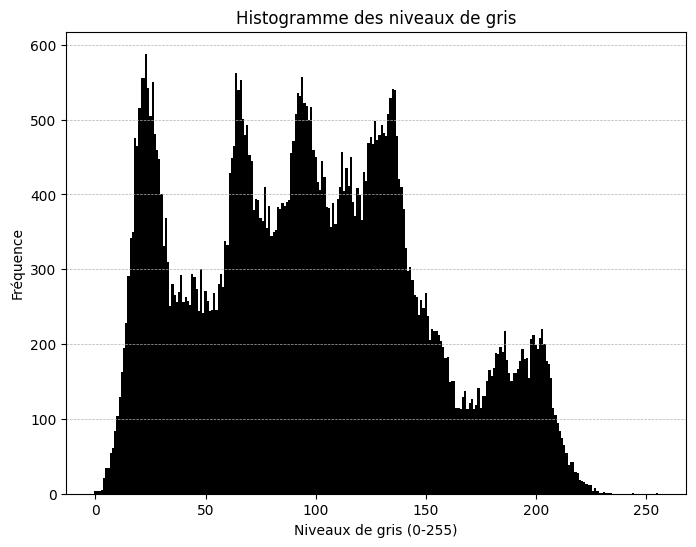

In [ ]:
def calculate_histogram(image):
    histogram = [0] * 256
    h, w = image.shape[:2]
    for row in range(h):
        for col in range(w):
            intensity = image[row, col]
            histogram[intensity] += 1
    return histogram

def plot_hist(histogram):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(histogram)), histogram, color="black", width=1.0)
    plt.title("Histogramme des niveaux de gris")
    plt.xlabel("Niveaux de gris (0-255)")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

# Charger l'image
image_path = "/content/lena.tif"
image = cv2.imread(image_path)

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculer l'histogramme de l'image en niveaux de gris
histogram = calculate_histogram(gray_image)

# Afficher l'histogramme
plot_hist(histogram)


## b.Histogramme cumulé

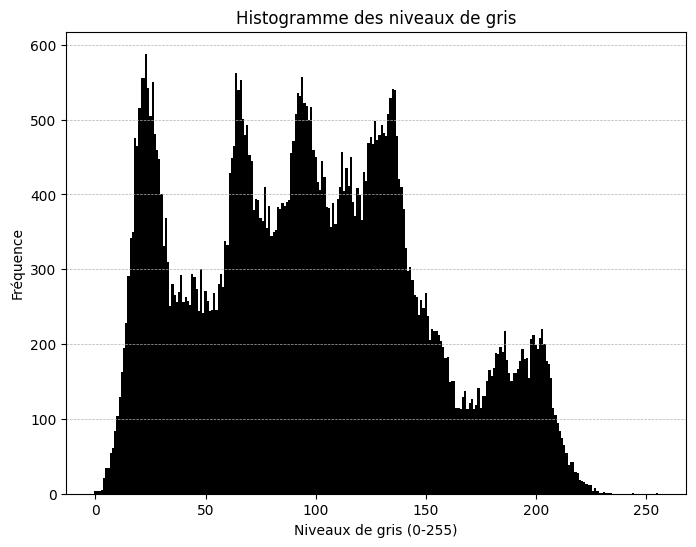

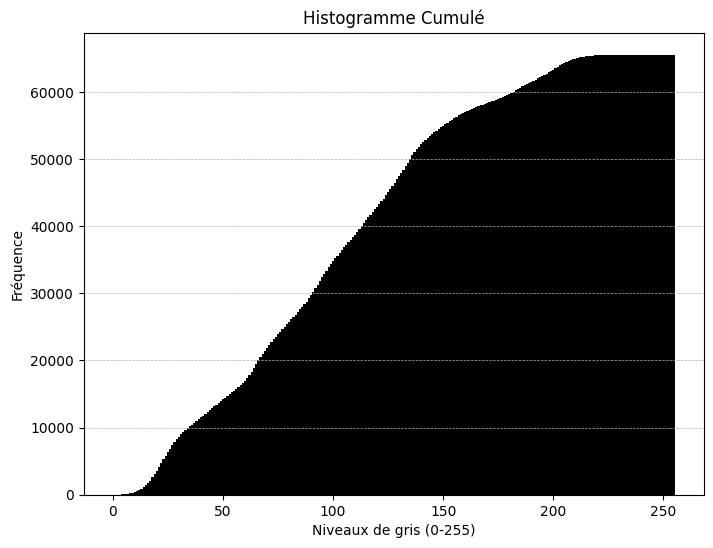

In [ ]:


def calculate_histogram(image):
    histogram = [0] * 256
    h, w = image.shape[:2]
    for row in range(h):
        for col in range(w):
            intensity = image[row, col]
            histogram[intensity] += 1
    return histogram

def calculate_cumulative_histogram(histogram):
    cumulative_histogram = [0] * 256
    cumulative_histogram[0] = histogram[0]
    for i in range(1, 256):
        cumulative_histogram[i] = cumulative_histogram[i-1] + histogram[i]
    return cumulative_histogram

def plot_hist(histogram, title="Histogramme"):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(histogram)), histogram, color="black", width=1.0)
    plt.title(title)
    plt.xlabel("Niveaux de gris (0-255)")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

# Charger l'image
image_path = "/content/lena.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculer l'histogramme
histogram = calculate_histogram(image)

# Calculer l'histogramme cumulé
cumulative_histogram = calculate_cumulative_histogram(histogram)

# Afficher l'histogramme de l'image
plot_hist(histogram, title="Histogramme des niveaux de gris")

# Afficher l'histogramme cumulé
plot_hist(cumulative_histogram, title="Histogramme Cumulé")


##c. Recadrage de la dynamique (normalisation des niveaux de gris)

$ g(x,y) = 255 * \frac { f(x,y) - min(f)} {max(f) - min(f)} $


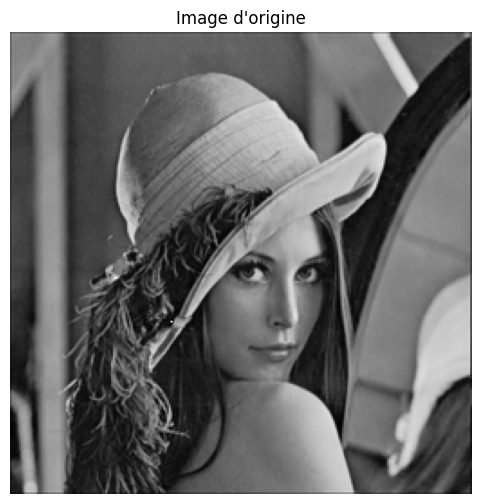

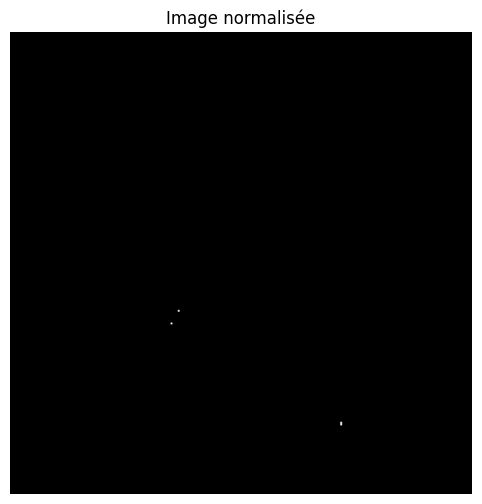

In [ ]:
def normalize_image(image):
    # Trouver les niveaux de gris minimum et maximum
    min_val = image.min()
    max_val = image.max()

    # Normalisation des niveaux de gris (linéaire)
    normalized_image = (image - min_val) * 255 / (max_val - min_val)

    # Convertir l'image normalisée en entier
    normalized_image = normalized_image.astype('uint8')

    return normalized_image

def plot_image(image, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Charger l'image
image_path = "/content/lena.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Appliquer la normalisation
normalized_image = normalize_image(image)

# Afficher l'image d'origine et l'image normalisée
plot_image(image, title="Image d'origine")
plot_image(normalized_image, title="Image normalisée")


##d. Seuillage (binarisation de l'image)

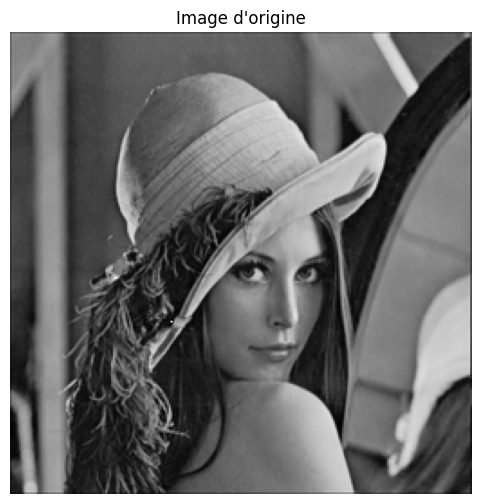

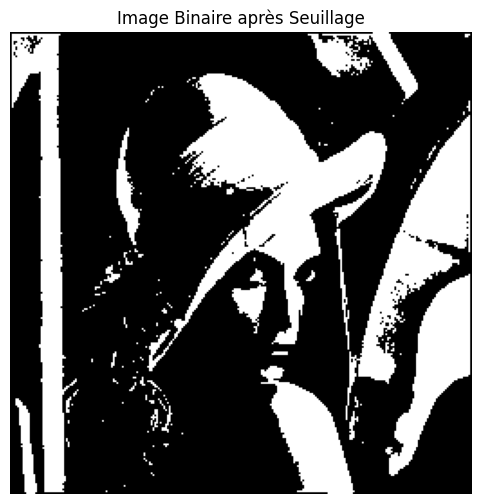

In [ ]:
def threshold_image(image, threshold_value):
    # Appliquer le seuillage global : pixels supérieurs au seuil deviennent 255 (blanc), sinon 0 (noir)
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_image

def plot_image(image, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Charger l'image
image_path = "/content/lena.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Appliquer le seuillage avec un seuil fixé (par exemple, 128)
threshold_value = 128
binary_image = threshold_image(image, threshold_value)

# Afficher l'image d'origine et l'image binaire
plot_image(image, title="Image d'origine")
plot_image(binary_image, title="Image Binaire après Seuillage")


## e.Image inverse

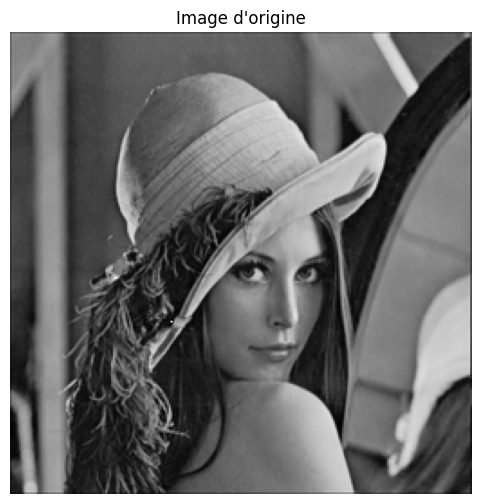

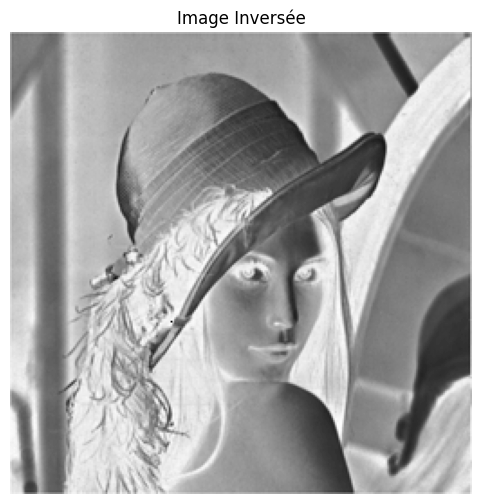

In [ ]:
def invert_image(image):
    # Inverser les pixels de l'image : 255 - valeur du pixel
    inverted_image = 255 - image
    return inverted_image

def plot_image(image, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()



# Inverser l'image
inverted_image = invert_image(image)

# Afficher l'image d'origine et l'image inversée
plot_image(image, title="Image d'origine")
plot_image(inverted_image, title="Image Inversée")

## f.Égalisation de l'histogramme

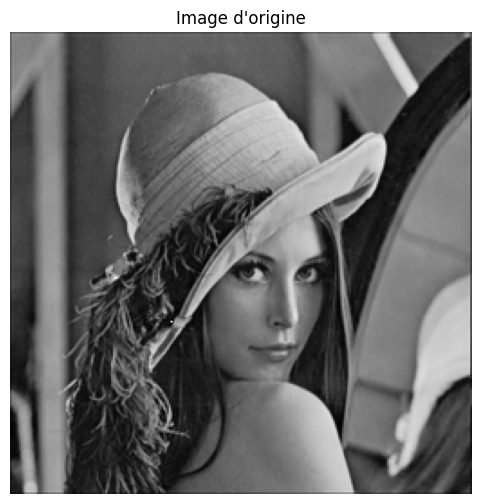

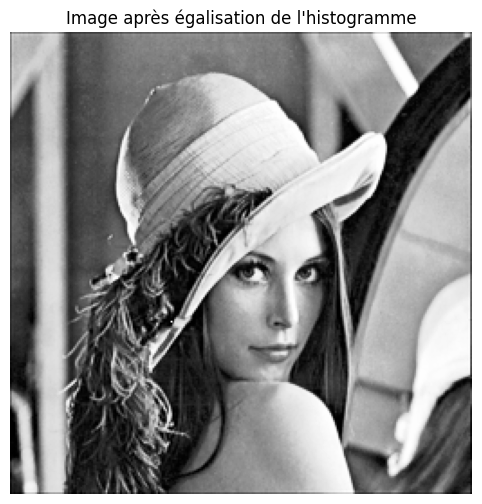

In [ ]:


def equalize_histogram(image):
    # Calculer l'histogramme
    histogram = calculate_histogram(image)

    # Calculer l'histogramme cumulé
    cumulative_histogram = calculate_cumulative_histogram(histogram)

    # Normaliser l'histogramme cumulé
    min_cumulative = cumulative_histogram[0]
    max_cumulative = cumulative_histogram[-1]
    num_pixels = image.size  # Nombre total de pixels dans l'image

    # Créer une nouvelle image avec l'égalisation de l'histogramme
    equalized_image = image.copy()
    h, w = image.shape[:2]

    # Appliquer l'égalisation de l'histogramme pixel par pixel
    for row in range(h):
        for col in range(w):
            pixel_value = image[row, col]
            # Appliquer la transformation linéaire
            equalized_image[row, col] = (cumulative_histogram[pixel_value] - min_cumulative) * 255 / (max_cumulative - min_cumulative)

    equalized_image = equalized_image.astype('uint8')
    return equalized_image

def plot_image(image, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Appliquer l'égalisation de l'histogramme
equalized_image = equalize_histogram(image)

# Afficher l'image d'origine et l'image égalisée
plot_image(image, title="Image d'origine")
plot_image(equalized_image, title="Image après égalisation de l'histogramme")


## g. Transformation exponentielle

$ g(x, y) = \frac{g_{\text{max}}}{g_{\text{min } ^ {\lambda}}  }  f(x,y) ^ \lambda $

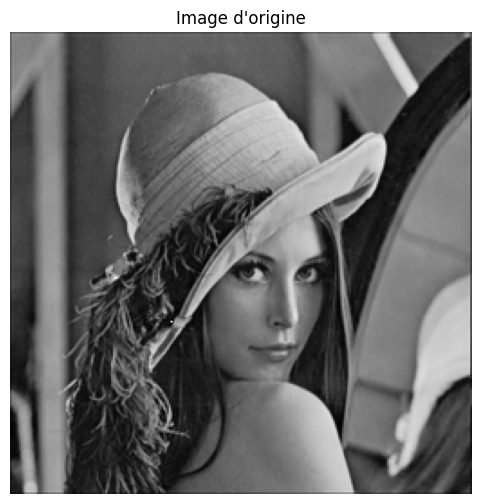

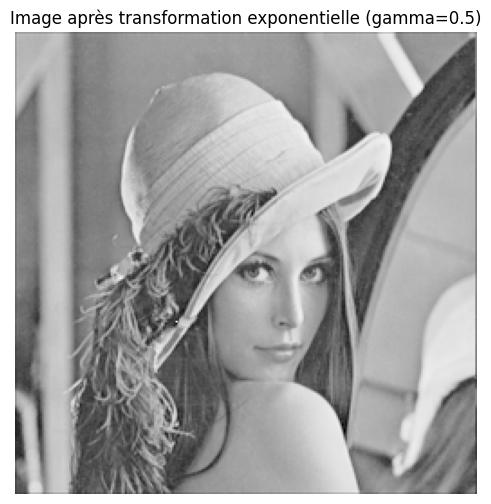

In [ ]:


def exponential_transformation(image, gamma):
    # Normaliser l'image pour qu'elle soit entre 0 et 1
    normalized_image = image / 255.0

    # Appliquer la transformation exponentielle
    transformed_image = np.power(normalized_image, gamma)

    # Re-scaler l'image pour qu'elle soit entre 0 et 255
    transformed_image = (transformed_image * 255).astype('uint8')

    return transformed_image

def plot_image(image, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Appliquer la transformation exponentielle avec un gamma donné
gamma = 0.5
transformed_image = exponential_transformation(image, gamma)

# Afficher l'image d'origine et l'image après transformation exponentielle
plot_image(image, title="Image d'origine")
plot_image(transformed_image, title=f"Image après transformation exponentielle (gamma={gamma})")


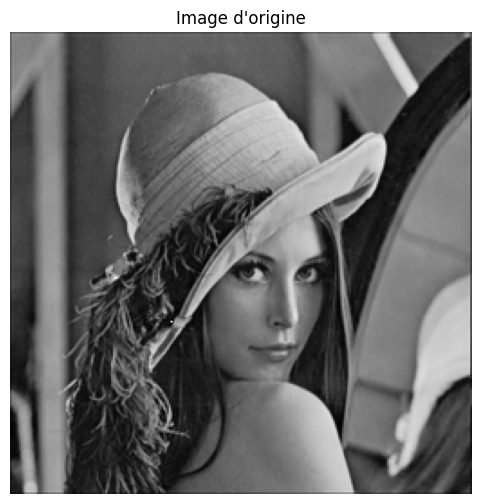

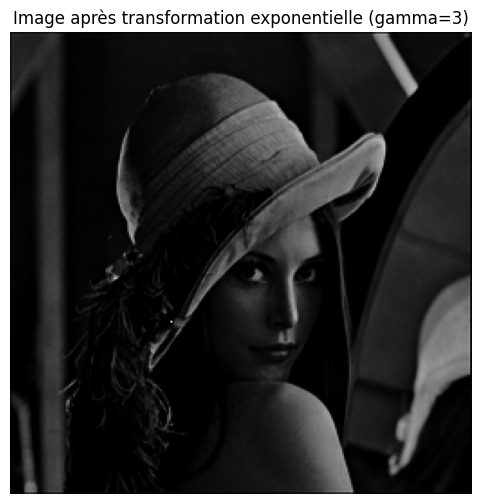

In [ ]:
gamma = 3
transformed_image = exponential_transformation(image, gamma)

# Afficher l'image d'origine et l'image après transformation exponentielle
plot_image(image, title="Image d'origine")
plot_image(transformed_image, title=f"Image après transformation exponentielle (gamma={gamma})")

# 3.Comparaison des Résultats : Implémentation Manuelle vs Fonctions **OpenCV**

##a. Calcul de l'histogramme

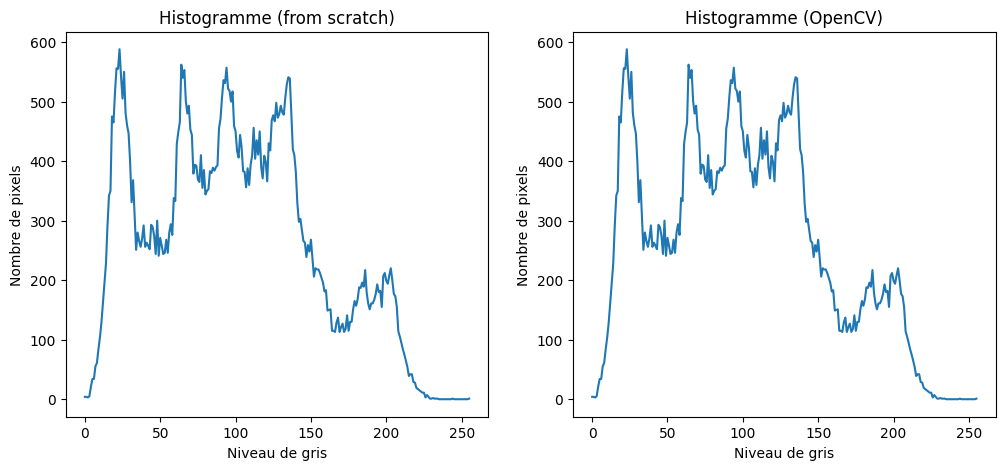

In [ ]:
# Histogramme avec OpenCV
opencv_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256]).flatten()

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(histogram)
plt.title("Histogramme (from scratch)")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.subplot(1, 2, 2)
plt.plot(opencv_hist)
plt.title("Histogramme (OpenCV)")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")
plt.show()

## b. Histogramme cumulé

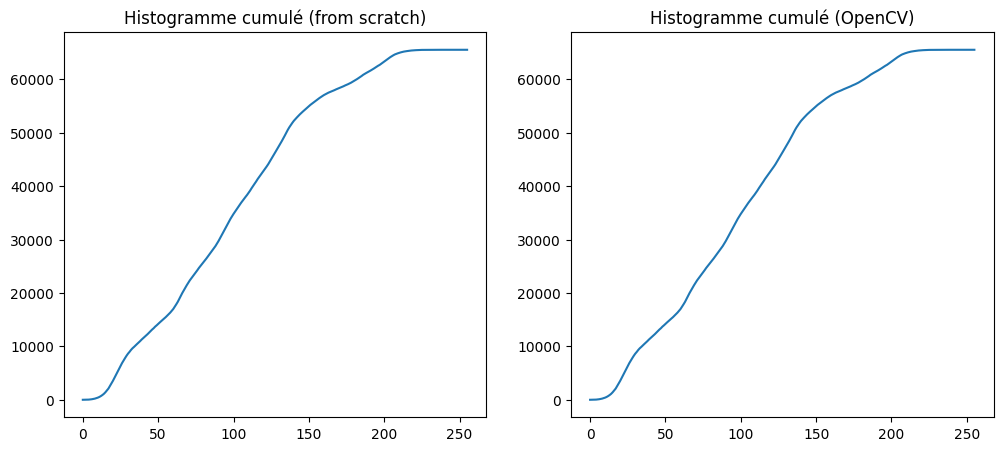

In [ ]:
# Histogramme cumulé avec OpenCV
opencv_cumulative_hist = np.cumsum(opencv_hist)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cumulative_histogram)
plt.title("Histogramme cumulé (from scratch)")

plt.subplot(1, 2, 2)
plt.plot(opencv_cumulative_hist)
plt.title("Histogramme cumulé (OpenCV)")
plt.show()

##c. Recadrage de la dynamique (normalisation)

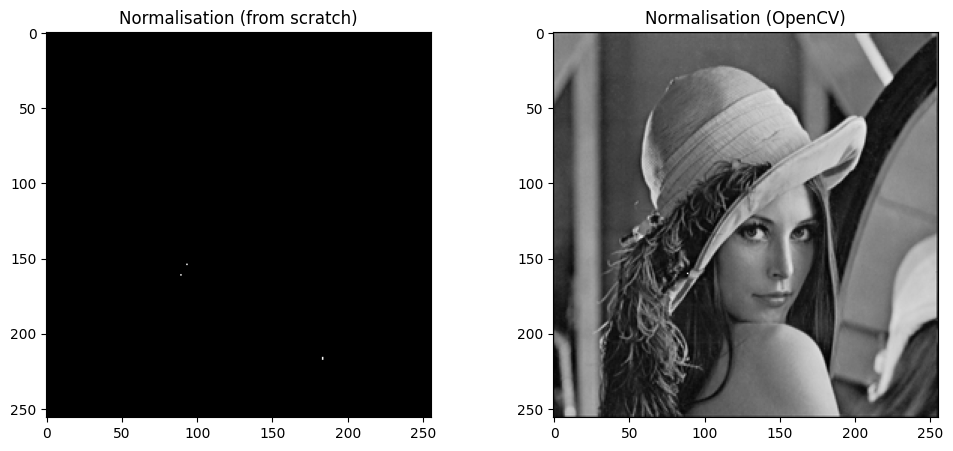

In [ ]:
# Normalisation avec OpenCV
opencv_normalized = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

# Comparaison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalisation (from scratch)")

plt.subplot(1, 2, 2)
plt.imshow(opencv_normalized, cmap='gray')
plt.title("Normalisation (OpenCV)")
plt.show()